# Principal Component Analysis

## Lecture 6

### GRA 4160
### Predictive modelling with machine learning

#### Lecturer: Vegard H. Larsen

# Introduction to Principal Component Analysis

Principal Component Analysis (PCA) is a dimensionality reduction technique that is commonly used in machine learning and statistics.
The goal of PCA is to find the most important underlying structure in a dataset, which is often a lower-dimensional subspace.

One way to mathematically describe PCA is through the following steps:

1. Center the data by subtracting the mean from each feature
2. Compute the covariance matrix of the centered data
3. Compute the eigenvectors and eigenvalues of the covariance matrix
4. Select the eigenvectors with the largest eigenvalues, these are the principal components
5. Project the data onto the subspace spanned by the principal components

The centered data is represented as $\bar{X}$, the covariance matrix is represented as $\Sigma$, the eigenvectors are represented as $V$ and the eigenvalues are represented as $\Lambda$:

$$\bar{X} = X - mean(X)$$
$$\Sigma = (1/n) \bar{X}'\bar{X}$$
$$ \Lambda, V = eig(\Sigma)$$

where $X$ is the original data matrix, $mean(X)$ is the mean of all columns of $X$, $n$ is the number of observations in $X$. 
The $eig()$ function is used to calculate the eigenvectors and eigenvalues of the covariance matrix.

These principal components can be used to project the data onto a lower dimensional subspace, resulting in a new matrix called $\hat{X}$.

$$\hat{X} = \bar{X} V$$

This new matrix $\hat{X}$ will have the same number of rows as the original data but fewer columns and will contain the most important information of the original data.

<p>

### Alternative: Estimation using SVD

Singular Value Decomposition (SVD) is another technique that can be used to estimate the principal components of a dataset. 
SVD is a factorization of the matrix, and it can be used to decompose a matrix into simpler, more interpretable components.

The SVD decomposition of a matrix X can be written as:

$$X = U \Sigma V'$$

Where $U$ and $V$ are orthonormal matrices and $\Sigma$ is a diagonal matrix with non-negative real numbers on the diagonal, called the singular values.

To estimate the principal components using SVD, we can follow these steps:

1. Compute the SVD of the data matrix $X$: $X = U \Sigma V'$
2. The columns of $V$ are the right singular vectors, and they correspond to the principal components of the data
3. The diagonal elements of the matrix $\Sigma$ are the singular values, and they represent the amount of variance explained by each principal component

Just like PCA, we can use the principal components obtained from SVD to project the data onto a lower dimensional subspace, resulting in a new matrix called $\hat{X}$: $\hat{X} = XV$

Let's look at an example of how to use PCA to reduce the dimensionality of a dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Seeds dataset

The "seeds.csv" dataset is commonly used to demonstrate principal component analysis (PCA) because it contains measurements of the geometric properties of kernels belonging to two different varieties of wheat.
The dataset contains 7 attributes (features) and 140 observations.

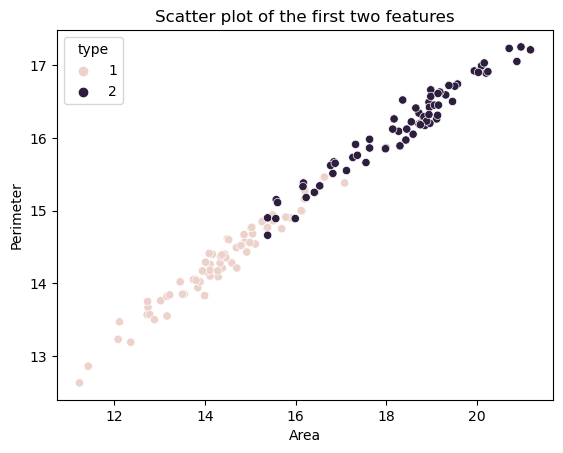

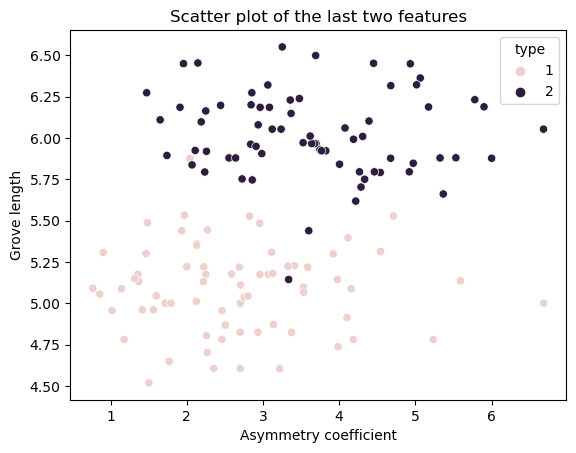

In [2]:
# Load the CSV data
seeds = pd.read_csv('../data/seeds.csv')

# Extract the features and apply PCA to reduce the dimensionality of the data set to 2 principal components
X = seeds[['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry_coefficient', 'grove_length']]

# Visualize the data set using a scatter plot of the first two features
sns.scatterplot(data=seeds, x='area', y='perimeter', hue='type', sizes=(20, 200))
plt.title('Scatter plot of the first two features')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.show()

# Visualize the data set using a scatter plot of the last two features
sns.scatterplot(data=seeds, x='asymmetry_coefficient', y='grove_length', hue='type', sizes=(20, 200))
plt.title('Scatter plot of the last two features')
plt.xlabel('Asymmetry coefficient')
plt.ylabel('Grove length')
plt.show()

In [3]:
seeds

,area,perimeter,compactness,length,width,asymmetry_coefficient,grove_length,type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
135,15.38,14.66,0.8990,5.477,3.465,3.600,5.439,2
136,17.36,15.76,0.8785,6.145,3.574,3.526,5.971,2
137,15.57,15.15,0.8527,5.920,3.231,2.640,5.879,2
138,15.60,15.11,0.8580,5.832,3.286,2.725,5.752,2


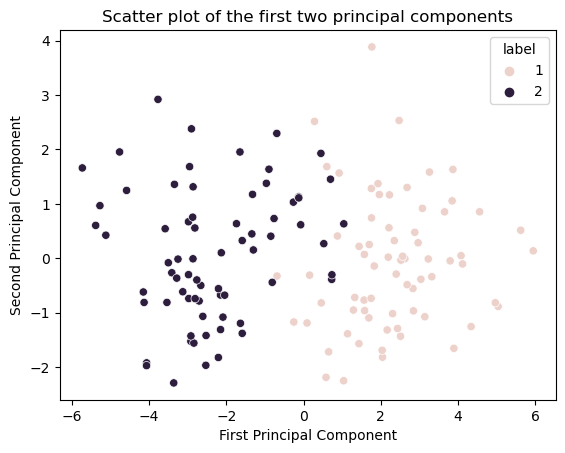

In [4]:
# Import the PCA class from scikit-learn
from sklearn.decomposition import PCA

# Create a PCA instance with 2 components
pca = PCA(n_components=2)
pca.fit(X)
principal_components = pca.components_

# Project the data onto the first two principal components and create a data frame with the projected data
data_projected = pd.DataFrame(pca.transform(X), columns=['first', 'second'])
data_projected['label'] = seeds['type']

# Visualize the data set using a scatter plot of the first two principal components
sns.scatterplot(data=data_projected, x='first', y='second', hue='label', sizes=(20, 200))
plt.title('Scatter plot of the first two principal components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [5]:
# Print the explained variance ratio

print(f'The explained variance ratio is: {pca.explained_variance_ratio_.round(2)}')

The explained variance ratio is: [0.83 0.16]


## Feature scaling

Feature scaling through standardization (or Z-score normalization) can be an important preprocessing step for many machine learning algorithms.
As we have talked about earlier, standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one.

In PCA we are interested in the components that maximize the variance.
If one component (e.g. human height) varies less than another (e.g. weight) because of their respective scales (meters vs. kilos), PCA might determine that the direction of maximal variance more closely corresponds with the weight axis, if those features are not scaled.
As a change in height of one meter can be considered much more important than the change in weight of one kilogram, this is not what we want.

Reference: http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html

## The wine dataset

The wine dataset is a multiclass classification dataset that contains the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars.
The cultivars are identified as "class_0", "class_1", and "class_2" in the dataset.

The wine dataset contains a total of 178 samples, each with 13 features.
The features are the results of the chemical analysis, including the alcohol content, malic acid, ash, alcalinity of ash, magnesium, total phenols, flavonoids, nonflavanoid phenols, proanthocyanins, color intensity, hue, OD280/OD315 of diluted wines, and proline.

The target variable in the wine dataset is the cultivar, which is a categorical variable with three possible values: "class_0", "class_1", and "class_2".
The dataset is commonly used as a benchmark dataset for testing classification algorithms.

Scikit-learn provides the wine dataset as part of its datasets module, and can be loaded using the load_wine() function from the datasets module

In [6]:
from sklearn.datasets import load_wine

# Load the sample data
features, target = load_wine(return_X_y=True)

np.shape(features)

(178, 13)

## Visualize PCA components with scaling

The figures below show the 1st and 2nd components with the original data set and then with the scaled (standardized) data set

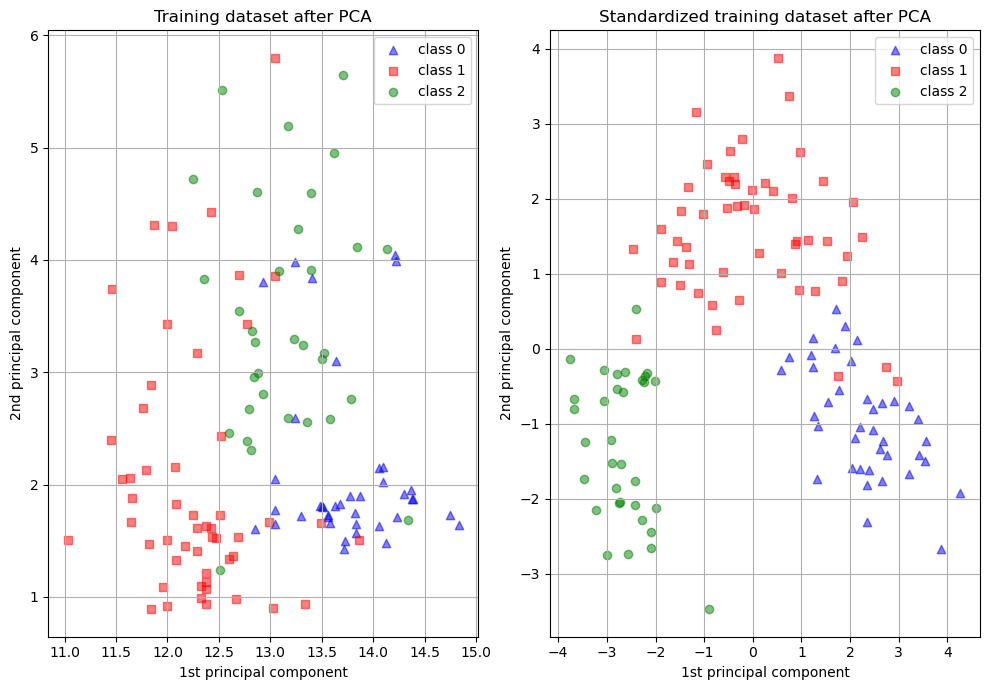

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

# Make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30)

# Fit to data and predict using pipelined GNB and PCA.
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

# Fit to data and predict using pipelined scaling, GNB and PCA.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

# Extract PCA from pipeline
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']

# Scale and use PCA on X_train data for visualization.
scaler = std_clf.named_steps['standardscaler']
X_train_std = pca_std.transform(scaler.transform(X_train))

# Visualize original vs standarized dataset with PCA performed
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 7))
for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train[y_train == l, 0], X_train[y_train == l, 1],
                color=c, label='class %s' % l, alpha=0.5, marker=m)

for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std[y_train == l, 0], X_train_std[y_train == l, 1],
                color=c, label='class %s' % l, alpha=0.5, marker=m)

ax1.set_title('Training dataset after PCA')
ax2.set_title('Standardized training dataset after PCA')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()

## Check prediction performance with and without feature scaling

In [8]:
from sklearn import metrics

# Show prediction accuracies in scaled and unscaled data.
norm_pred_accuracy = metrics.accuracy_score(y_test, pred_test)
std_pred_accuracy = metrics.accuracy_score(y_test, pred_test_std)
print(f'Prediction accuracy for the normal test dataset with PCA: {norm_pred_accuracy.round(2)}')
print(f'Prediction accuracy for the standardized test dataset with PCA: {std_pred_accuracy.round(2)}')

Prediction accuracy for the normal test dataset with PCA: 0.76
Prediction accuracy for the standardized test dataset with PCA: 0.96
